In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [11]:
# Load training data
with h5py.File("/content/train_happy.h5", 'r') as f:
    print("Train keys:", list(f.keys()))
    X_train = np.array(f['train_set_x'])
    y_train = np.array(f['train_set_y'])

# Load testing data
with h5py.File("/content/test_happy (1).h5", 'r') as f:
    print("Test keys:", list(f.keys()))
    X_test = np.array(f['test_set_x'])
    y_test = np.array(f['test_set_y'])

Train keys: ['list_classes', 'train_set_x', 'train_set_y']
Test keys: ['list_classes', 'test_set_x', 'test_set_y']


In [28]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (600, 64, 64, 3)
y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
y_test shape: (150,)


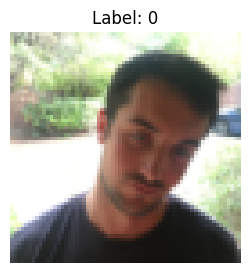

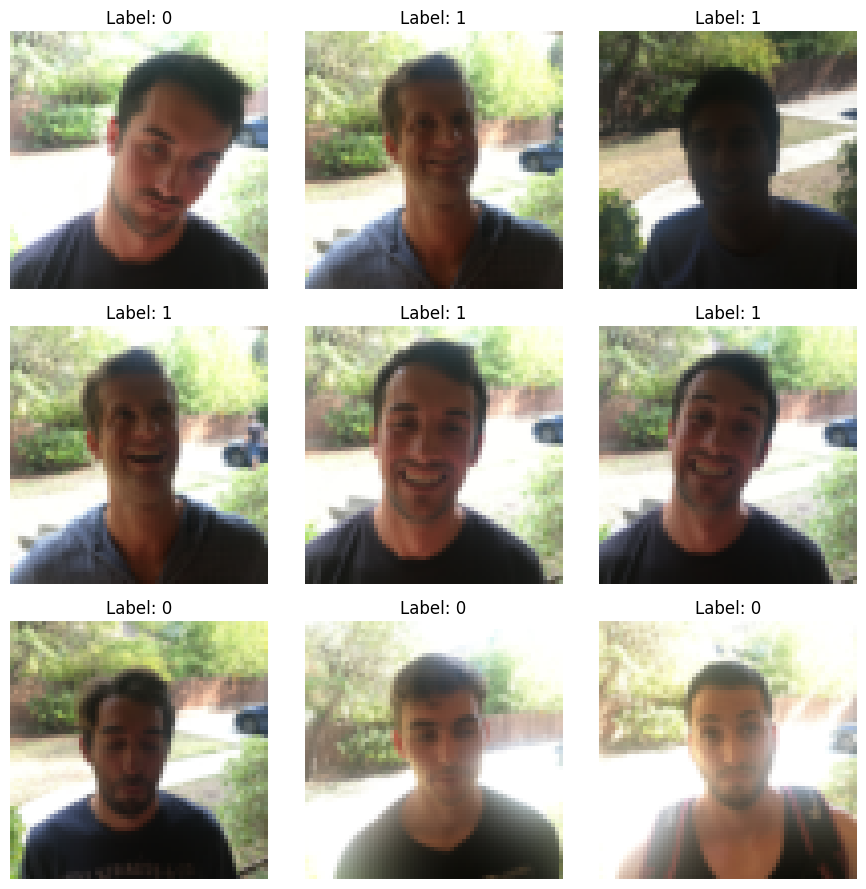

In [29]:
def show_single_image(index):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train[index])  # Show the image
    plt.title(f"Label: {y_train[index]}")  # Show its label
    plt.axis('off')  # Hide axes
    plt.show()

# Function to display multiple images in a grid
def show_grid_images(rows=3, cols=3):
    plt.figure(figsize=(cols * 3, rows * 3))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X_train[i])
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show a single image (change index to explore different images)
show_single_image(0)  # You can try 1, 2, 10, etc.

# Show a 3x3 grid of images
show_grid_images(3, 3)

In [30]:

X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)


In [32]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_params(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)

    # Compute cost
    cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}

    return grads, cost

# Gradient descent optimization
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        # Update params
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]

        # Record the cost
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")

    params = {"w": w, "b": b}
    grads = {"dw": grads["dw"], "db": grads["db"]}

    return params, grads, costs

# Predict using learned params
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_pred[0, i] = 1 if A[0, i] > 0.5 else 0

    return Y_pred


In [33]:
# Flatten images and normalize
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T / 255.0  # shape (12288, 600)
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T / 255.0     # shape (12288, 150)

# Reshape labels to (1, m)
Y_train = y_train.reshape(1, -1)  # shape (1, 600)
Y_test = y_test.reshape(1, -1)    # shape (1, 150)


In [34]:
# Initialize parameters
dim = X_train_flatten.shape[0]  # 12288
w, b = initialize_params(dim)

# Train model
params, grads, costs = optimize(w, b, X_train_flatten, Y_train, num_iterations=2000, learning_rate=0.005, print_cost=True)

# Predict on train and test
Y_train_pred = predict(params["w"], params["b"], X_train_flatten)
Y_test_pred = predict(params["w"], params["b"], X_test_flatten)

# Compute accuracy
train_accuracy = 100 - np.mean(np.abs(Y_train_pred - Y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(Y_test_pred - Y_test)) * 100

print(f"Train Accuracy: {train_accuracy} %")
print(f"Test Accuracy: {test_accuracy} %")


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 1.4584911964342253
Cost after iteration 200: 0.6822890383996323
Cost after iteration 300: 0.42632903558073687
Cost after iteration 400: 0.21064244507260055
Cost after iteration 500: 0.18098559901381003
Cost after iteration 600: 0.1688361181572092
Cost after iteration 700: 0.1594913286195856
Cost after iteration 800: 0.15169192978313764
Cost after iteration 900: 0.14494406248999822
Cost after iteration 1000: 0.138995417612947
Cost after iteration 1100: 0.13368902564786198
Cost after iteration 1200: 0.12891447520801075
Cost after iteration 1300: 0.12458848351429747
Cost after iteration 1400: 0.12064566932966386
Cost after iteration 1500: 0.11703342926206033
Cost after iteration 1600: 0.11370872868242496
Cost after iteration 1700: 0.11063591850837516
Cost after iteration 1800: 0.10778516780724097
Cost after iteration 1900: 0.10513129832112812
Train Accuracy: 98.16666666666667 %
Test Accuracy: 95.33333333333333 %


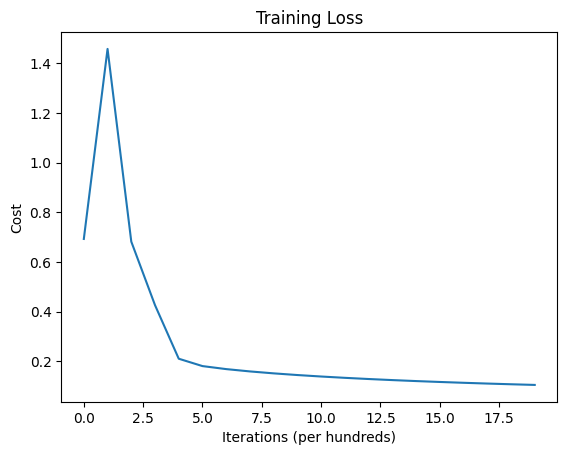

In [20]:
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Training Loss')
plt.show()


In [22]:
# Flatten and normalize
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Initialize SVM with a linear kernel
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM
svm_clf.fit(X_train_flat, y_train)


SVC(kernel='linear', random_state=42)

Train Accuracy: 100.00%
Test Accuracy: 96.67%


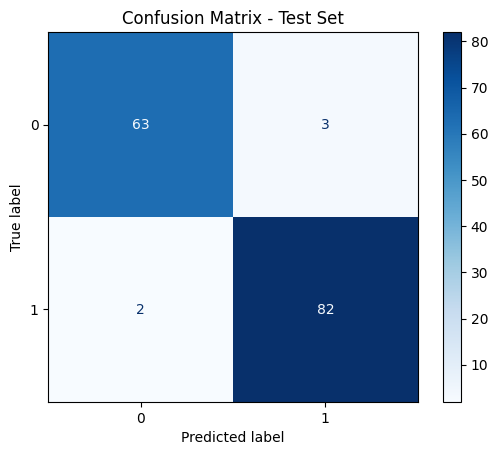

In [24]:
y_train_pred = svm_clf.predict(X_train_flat)
y_test_pred = svm_clf.predict(X_test_flat)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_test_pred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()



In [26]:
svm_clf_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_clf_rbf.fit(X_train_flat, y_train)
print("Test accuracy with RBF kernel:", accuracy_score(y_test, svm_clf_rbf.predict(X_test_flat)))


Test accuracy with RBF kernel: 0.9466666666666667


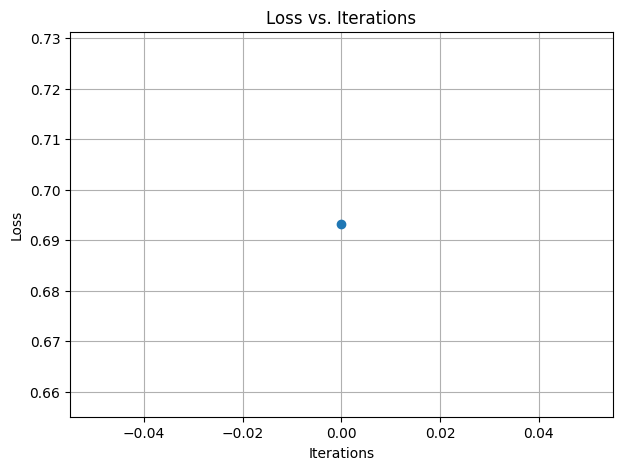

In [36]:
# --- Plot Training Loss ---
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(costs)) * 100, costs, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs. Iterations")
plt.grid(True)
plt.show()


In [37]:
# --- Preprocess ---
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0
X_train_T, X_test_T = X_train_flat.T, X_test_flat.T
y_train_T = y_train.reshape(1, -1)
y_test_T = y_test.reshape(1, -1)


LR: 0.0001, Test Acc: 67.33%
LR: 0.001, Test Acc: 92.00%
LR: 0.005, Test Acc: 94.67%
LR: 0.01, Test Acc: 95.33%


/tmp/ipython-input-32-997201143.py:20: RuntimeWarning: divide by zero encountered in log
  cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/tmp/ipython-input-32-997201143.py:20: RuntimeWarning: invalid value encountered in multiply
  cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/tmp/ipython-input-32-997201143.py:20: RuntimeWarning: divide by zero encountered in log
  cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/tmp/ipython-input-32-997201143.py:20: RuntimeWarning: invalid value encountered in multiply
  cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/tmp/ipython-input-32-997201143.py:20: RuntimeWarning: divide by zero encountered in log
  cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/tmp/ipython-input-32-997201143.py:20: RuntimeWarning: invalid value encountered in multiply
  cost = - (1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/tmp/ipython-input-32-997201143.py:20: RuntimeWarnin

LR: 0.05, Test Acc: 92.00%


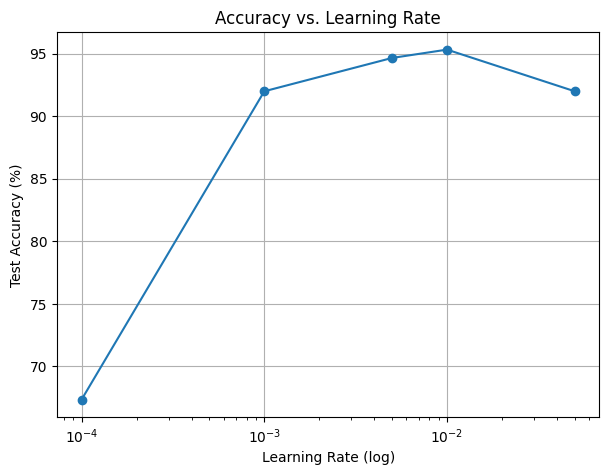

In [38]:
learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.05]
test_accuracies = []

for lr in learning_rates:
    w, b = initialize_params(X_train_T.shape[0])
    params, _, _ = optimize(w, b, X_train_T, y_train_T, 1500, lr)
    preds = predict(params["w"], params["b"], X_test_T)
    acc = 100 - np.mean(np.abs(preds - y_test_T)) * 100
    test_accuracies.append(acc)
    print(f"LR: {lr}, Test Acc: {acc:.2f}%")

plt.figure(figsize=(7, 5))
plt.plot(learning_rates, test_accuracies, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate (log)")
plt.ylabel("Test Accuracy (%)")
plt.title("Accuracy vs. Learning Rate")
plt.grid(True)
plt.show()


Size: 20%, Test Acc: 86.67%
Size: 40%, Test Acc: 93.33%
Size: 60%, Test Acc: 94.67%
Size: 80%, Test Acc: 94.67%
Size: 99%, Test Acc: 94.67%


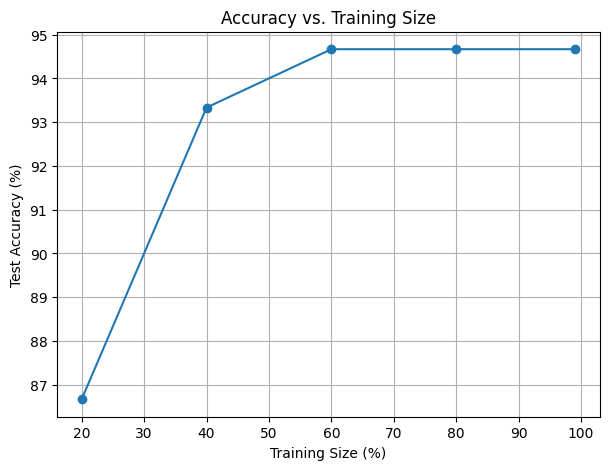

In [39]:
train_sizes = [0.2, 0.4, 0.6, 0.8, 0.99]
size_accuracies = []

for size in train_sizes:
    X_part, _, y_part, _ = train_test_split(
        X_train_flat, y_train.reshape(-1), train_size=size, stratify=y_train, random_state=42)

    w, b = initialize_params(X_part.shape[1])
    params, _, _ = optimize(w, b, X_part.T, y_part.reshape(1, -1), 1500, 0.005)
    preds = predict(params["w"], params["b"], X_test_T)
    acc = 100 - np.mean(np.abs(preds - y_test_T)) * 100
    size_accuracies.append(acc)
    print(f"Size: {int(size*100)}%, Test Acc: {acc:.2f}%")

plt.figure(figsize=(7, 5))
plt.plot(np.array(train_sizes) * 100, size_accuracies, marker='o')
plt.xlabel("Training Size (%)")
plt.ylabel("Test Accuracy (%)")
plt.title("Accuracy vs. Training Size")
plt.grid(True)
plt.show()
